In this notebook, we want to get a first perception of the dataset.

In [1]:
import pandas as pd
df = pd.read_csv('./df_withcompany.csv')
df.head()

,icao24_callsign,min_vertrate_spd_climb,max_vertrate_spd_climb,min_spd_climb,max_spd_climb,delta_h_climb,vertrate_std_spd_climb,vertrate_avg_spd_climb,std_spd_climb,avg_spd_climb,...,max_vertrate_spd_descent,min_spd_descent,max_spd_descent,delta_h_descent,vertrate_std_spd_descent,vertrate_avg_spd_descent,std_spd_descent,avg_spd_descent,duration_descent,operatoricao
0,020108_MAC266,0.00000,23.73376,72.040531,231.708342,10546.08,5.646865,9.521831,43.345834,176.165576,...,0.32512,59.080483,226.124327,-11033.76,4.979558,-8.045507,56.977349,158.548631,1420,MAC
1,06a08d_QTR3485,-0.32512,14.63040,90.086474,239.974203,10744.20,3.234501,6.141377,35.152508,209.307688,...,0.32512,67.252609,241.052561,-10888.98,2.628688,-5.726423,55.054771,164.937370,2090,QTR
2,06a091_QTR3281,0.32512,16.58112,67.635203,245.416210,11094.72,3.098535,6.474980,40.874531,209.151110,...,0.32512,63.284976,236.053570,-11186.16,4.973232,-6.981524,58.628951,152.980904,2030,QTR
3,33ffc1_IAM3174,0.32512,17.55648,74.024541,257.401478,10896.60,3.609616,9.387840,54.463798,204.257835,...,1.62560,69.373684,260.650047,-11186.16,8.331098,-9.346615,61.177911,179.921102,1730,IAM
4,34134e_IBE34BP,2.27584,17.88160,71.093853,246.227431,10751.82,3.276368,8.927853,50.655721,199.158926,...,0.32512,53.197092,254.696024,-10637.52,4.243448,-7.746113,58.320335,179.967827,1430,IBE


<AxesSubplot:>

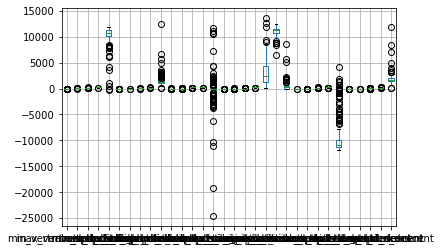

In [2]:
df1 = df.drop('icao24_callsign',axis = 1)
df1.boxplot()

To prepare for the machine learning step, one can normalize it and make it a Gaussian with zero mean and unit variance.

In [3]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

X_train = df1.drop('operatoricao',axis=1)
X_scaled = preprocessing.scale(X_train)
y = df1.operatoricao

Compute a PCA to reduce the dimension:

In [4]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized',
          whiten=True).fit(X_train)
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_[:8])

[3.89091727e-01 2.50019613e-01 1.94778496e-01 8.60587932e-02
 4.07980892e-02 1.48133922e-02 1.37586601e-02 1.05683128e-02
 4.50069398e-05 2.14010421e-05 1.46305185e-05 1.33057414e-05
 6.91207208e-06 6.27496769e-06 2.08815698e-06 9.80838019e-07
 7.25272967e-07 4.74666488e-07 3.92317820e-07 2.07543665e-07
 1.26400304e-07 1.10811484e-07 7.41688648e-08 6.19088900e-08
 5.77596055e-08 2.82712844e-08 2.02558698e-08 1.68854421e-08
 8.77921845e-09 5.41703393e-09 4.80323038e-09 6.84715521e-10]


0.999887083776493

We can use the first eight variables to represent 99.989% of variability.

In [5]:
pca = PCA(n_components = 8, svd_solver='randomized',
          whiten=True).fit(X_train)
X_normalized_PCA= pca.transform(X_train)

In [6]:
y.value_counts()

EZY    28
EWG    21
DLH    20
AFR    20
WZZ    16
BAW    15
IBE    15
DAT    12
VLG    10
SWR     9
GWI     7
IBS     6
FIN     6
EDW     6
ASL     5
AUA     5
AZA     5
UAL     4
EIN     4
TAP     4
CTN     4
LDM     4
RZO     4
MEA     3
AAL     3
AMC     3
AEE     3
DAL     2
QTR     2
ACA     2
IGO     2
IAM     1
TCW     1
EJU     1
MAC     1
LZB     1
HVN     1
VOE     1
JBU     1
NKS     1
AAY     1
BER     1
Name: operatoricao, dtype: int64

In [7]:
cut = int(len(X_normalized_PCA)*0.75)
X_train = X_normalized_PCA[:cut]
y_train = y[:cut]
X_test = X_normalized_PCA[cut:]
y_test = y[cut:]

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=25, max_depth=None,min_samples_split=3, random_state=0)
scores = cross_val_score(clf, X_normalized_PCA, y, cv=5)
scores.mean()

/Users/z.wu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.14557329462989838